# Necessary Imports

In [1]:
# necessary imports
import numpy as np                # use for array and matrix stuff
import pandas as pd               # use for dataframes, think of it as excel
import math
import matplotlib.pyplot as plt   # use to make graphs

In [3]:
# Download the CSV file from Google Cloud Storage
# Reference the path when importing the file to a dataframe
csv_file_location = "C:\\Users\\Kha\\Documents\\Programming\\SYDE2023_Class_Profile\\csv\\final\\split\\household.csv"
df_name = pd.read_csv(csv_file_location)

# Exploratory Setup

In [5]:
# view the dataframe
df_name.head()

# use the SYDE Profile Question Mapping google sheet to know what the columns mean

,uid,gen_immigration,household_income,edu_parents,stem_edu_parents,eng_parents,siblings
0,808666,Second Generation,$50 001 - $75 000,Diploma,No,No,2.0
1,693735,1.5 Generation,$25 001 - $50 000,Bachelor's Degree,No,No,1.0
2,12234,Second Generation,$1 - $25 000,Associate's Degree,Yes,Yes,1.0
3,174664,1.5 Generation,$250 001 - $300 000,Master's Degree,Yes,Yes,1.0
4,651509,Second Generation,$300 000 +,"Professional Degree (JD, MD, etc.)",Yes,No,1.0


In [8]:
# If df.head() doesn't show all columns, use this to see all columns

df_name.columns.to_list()

['uid',
 'gen_immigration',
 'household_income',
 'edu_parents',
 'stem_edu_parents',
 'eng_parents',
 'siblings']

In [9]:
# Get some more information on the dataframe
df_name.describe()

,uid,siblings
count,67.000000,66.000000
mean,486065.686567,1.393939
std,279560.256239,0.942644
min,12234.000000,0.000000
25%,229010.000000,1.000000
50%,528593.000000,1.000000
75%,696746.500000,2.000000
max,978435.000000,6.000000


In [11]:
df_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               67 non-null     int64  
 1   gen_immigration   66 non-null     object 
 2   household_income  66 non-null     object 
 3   edu_parents       67 non-null     object 
 4   stem_edu_parents  67 non-null     object 
 5   eng_parents       67 non-null     object 
 6   siblings          66 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 3.8+ KB


In [10]:
# This is to check how many nulls there are - you will want to drop nulls later
df_name.count()

uid                 67
gen_immigration     66
household_income    66
edu_parents         67
stem_edu_parents    67
eng_parents         67
siblings            66
dtype: int64

In [20]:
# Create the working series (this is only for a single column, scroll down for multi columns)

df_gen_immigration = df_name['gen_immigration']
df_gen_immigration.head()

# For multiple columns - create a smaller dataframe (uid and gen_immigration)
# df_gen_immigration_df = df_name[['uid', 'gen_immigration']]

0    Second Generation
1       1.5 Generation
2    Second Generation
3       1.5 Generation
4    Second Generation
Name: gen_immigration, dtype: object

In [34]:
# Drop nulls
df_gen_immigration = df_gen_immigration.dropna()
df_gen_immigration.shape

(66,)

#### I have an old python file that I wrote for making graphs for the previous covid class profile. I will link how to use it here

# To use the graphs.py file, you need to make a jupyter notebook file in the ./graph_generation/ folder and then do this

import graphs

graphs.create_bar(...)

graphs.create_pie(...)

graphs.create_scatter(...)

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from collections import Counter
# import helpers

def create_bar(
    df, # pandas Series or pandas DataFrame
    column_name: str, # name of column in dataframe
    title_label: str, # x axis label (vertical)
    values_label : str, # y axis label (vertical)
    title: str, # title of graph
    vertical: bool, # True for vertical bars, False for horizontal bars
    values_increment: float = None, # default 1/10 of the max value in the y axis / count of dataframe
    values_max: float = None, # the max value in the dataframe
    splice_required: bool = False, # Use True if the values in the cells have commas that need to be split
    labels: list = [], # order in which the labels should be arranged
    colours = [], # list of strings of hexcodes ['#0000FF', '#eb884a']
    display_as_percentage = False,
    display_legend = False,
    rotation_angle = 0
):    
    # Set default colour palette
    if (not colours):
        colours = sns.color_palette('muted')
    
    # drop nulls (technically you should have already dropped them)
    if(df[column_name].isnull().values.any()):
        df = df.dropna(axis=0)
        
    ######################
    ## Count the amount of instances of each occurence in the dataset
    count = Counter()
    if(splice_required):
        column_values = helpers.splice_cells_with_commas(df, column_name)
        for i in column_values:
            count[i] += 1
    else:
        for value in df[column_name]:
            count[value] += 1 
        
     ######################
    ## Put the counted values into a new dataframe
    
    if(labels):
        title_temp = list(count.keys())
        values_temp = list(count.values())
        dictionary = {title_temp[i] : values_temp[i] for i in range(0, len(title_temp))}

        df_temp = pd.DataFrame()
        df_temp['title'] = labels
        df_temp['values'] = 0

        for key, value in dictionary.items():
            df_temp.loc[df_temp.title == key, 'values'] = value
        x = np.arange(len(labels))  # the label locations
    
    else:
        df_temp = pd.DataFrame({'title': list(count.keys()), 'values': list(count.values())})
        x = df_temp['title']
        
    ######################
    ## Convert amount of people responded into percentages
    if(display_as_percentage):
        number_of_answers = len(df.index)
        df_temp['values'] = df_temp['values'] / number_of_answers * 100
    
    ###################
    ## Set axis interval increments
    
    if(not values_max):
        values_max = max(df_temp['values'])
        
    if(not values_increment):
        values_increment = math.ceil(values_max / 10)

    fig, ax = plt.subplots(figsize = (11,9))
    
    if(vertical):
        ax.bar(
            x = x,
            height = df_temp['values'],
            align = 'center',
            zorder = 3,
            color = colours,
            label = column_name,
            alpha = 0.75,
        )
        ax.set_xlabel(title_label)
        ax.set_ylabel(values_label)
        ax.yaxis.set_ticks(np.arange(0, values_max, values_increment))
        if(labels):
            ax.set_xticks(x)
            ax.set_xticklabels(labels)
        plt.xticks(rotation=rotation_angle, ha='right')
    else:
        ax.barh(
            y = x,
            width = df_temp['values'],
            align = 'center',
            zorder = 3,
            color = colours,
            label = column_name,
            alpha = 0.75,

        )
        ax.set_xlabel(values_label)
        ax.set_ylabel(title_label)
        ax.xaxis.set_ticks(np.arange(0, values_max, values_increment))
        if(labels):
            ax.set_yticks(x)
            ax.set_yticklabels(labels)
        plt.xticks(rotation=rotation_angle, ha='right')
    
    plt.rcParams['axes.facecolor'] = '#F0F0F0'
    ax.grid(color='w', linestyle='solid', zorder=0)
    if(display_legend):
        plt.legend(title="Legend", facecolor='white')
    plt.title(title)
#     plt.savefig('./graphs/' + str(column_name) + '.png')
#     plt.close()

def create_pie( 
    df, # your smaller pandas dataframe
    column_name, # column name in the dataframe
    title, # title of the pie chart
    labels = [] # labels for the legend to follow in specific order
): 
    count = Counter()
    
    if(df[column_name].isnull().values.any()):
        df = df.dropna(axis=0)

    for value in df[column_name]:
        count[value] += 1
        
    if(labels):
        title_temp = list(count.keys())
        values_temp = list(count.values())
        dictionary = {title_temp[i] : values_temp[i] for i in range(0, len(title_temp))}

        df_temp = pd.DataFrame()
        df_temp['title'] = labels
        df_temp['values'] = 0

        for key, value in dictionary.items():
            df_temp.loc[df_temp.title == key, 'values'] = value
    else:
        df_temp = pd.DataFrame({'title': list(count.keys()), 'values': list(count.values())})
        df_temp = df_temp.sort_values(by=['values'], ascending = False)
    
    fig = plt.figure(figsize = (11,9))
    plt.pie(
        x = df_temp['values'],
        labels = df_temp['title'],
        autopct = '%1.1f%%',
        startangle = 90,
        labeldistance = None,
       )
    
    plt.title(label = title)
    plt.legend(df_temp['title'], title='Legend')
    plt.axis('equal')
#     plt.savefig('./graphs/' + str(column_name) + '.png')
    plt.close()

def create_scatter(
    df,
    x_column_name,
    y_column_name,
    title,
    x_axis_label = None,
    y_axis_label = None,
    x_axis_values: list = []
): 
    df_temp = pd.DataFrame({x_column_name: df[x_column_name], y_column_name: df[y_column_name]})
    if(x_axis_values):
        df_temp = df_temp.sort_values(by=[x_axis_values])
    else:
        df_temp = df_temp.sort_values(by=[x_column_name], ascending=True)
    
    plt.figure(figsize = (11,9))
    plt.scatter(
        x = df_temp[x_column_name],
        y = df_temp[y_column_name],
    )
    plt.title(label = title)
    plt.grid()
    if(not x_axis_label):
        plt.xlabel(x_column_name)
    else:
        plt.xlabel(x_axis_label)
        
    if(not y_axis_label):
        plt.ylabel(y_column_name)
    else:
        plt.ylabel(y_axis_label)

#     plt.savefig('./graphs/' + str(x_column_name) + ' vs ' + str(y_column_name) + '.png')
    plt.close()

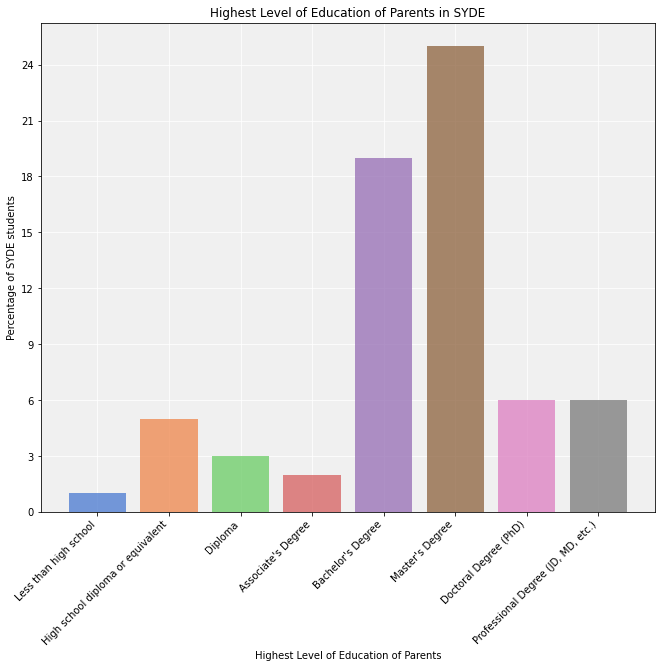

In [90]:
df_edu_parents = df_name[['uid', 'edu_parents']]
create_bar(
    df_edu_parents,
    column_name = 'edu_parents',
    title_label = 'Highest Level of Education of Parents',
    values_label = 'Percentage of SYDE students',
    title = 'Highest Level of Education of Parents in SYDE',
    vertical = True,
    rotation_angle = 45,
    labels = ['Less than high school', 'High school diploma or equivalent', 'Diploma', "Associate's Degree", "Bachelor's Degree", "Master's Degree", "Doctoral Degree (PhD)", "Professional Degree (JD, MD, etc.)"]
)